In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt

from matplotlib.backends.backend_pdf import PdfPages
#倒入一些必要的库

In [3]:
feanum=1#一共有多少特征
window=7#时间窗设置
 #读取数据

df = pd.read_csv('D:/R test/tst-mas-d-972950.csv')
df=df.iloc[:,1:]#删除前两列没用的
l=len(df)

df.tail()

,n
149,29
150,30
151,32
152,22
153,25


In [4]:
#这一部分在处理数据 将原始数据改造为模型需要的输入
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.as_matrix() #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length+1):#循环 数据长度-时间窗长度 次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum
cut=14#分训练集测试集 最后cut个样本为测试集
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [5]:
#展示下训练集测试集的形状 看有没有问题
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (133, 7, 1)
y_train (133,)
X_test (14, 7, 1)
y_test (14,)


In [6]:
y_train

array([39, 30, 33, 26, 31, 31, 13, 31, 25, 23, 32, 31, 36, 10, 30, 28, 26,
       24, 23, 30, 13, 25, 29, 26, 36, 23, 15, 29, 46, 25, 24, 34, 34, 26,
       22, 40, 29, 32, 39, 36, 26, 21, 40, 43, 19, 24, 19, 19, 25, 33, 16,
       30, 39, 27, 20, 10, 52, 37, 28, 26, 22, 21, 14, 48, 17, 22, 24, 21,
       14, 39, 29, 30, 20, 19, 25, 27, 49, 31, 23, 31, 29, 43, 18, 24, 41,
       34, 40, 45, 26, 17, 28, 25, 28, 27, 28, 15, 16, 16, 44, 42, 27, 37,
       23, 16, 18, 46, 45, 25, 25, 21, 14, 27, 33, 23, 37, 36, 29, 33, 25,
       47, 26, 22, 38, 26, 23, 25, 43, 15, 30, 37, 37, 20, 16],
      dtype=int64)

In [7]:
y_test

array([34, 30, 29, 32, 27, 23, 21, 42, 29, 29, 30, 32, 22, 25],
      dtype=int64)

In [8]:
#更改数组shape
X_train=X_train.reshape(len(X_train),window)
y_train=y_train.reshape(len(X_train))
X_test=X_test.reshape(cut,window)
y_test=y_test.reshape(cut)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (133, 7)
y_train (133,)
X_test (14, 7)
y_test (14,)


In [9]:
# Fit regression model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model = rf.fit(X_train, y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this

In [10]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [11]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

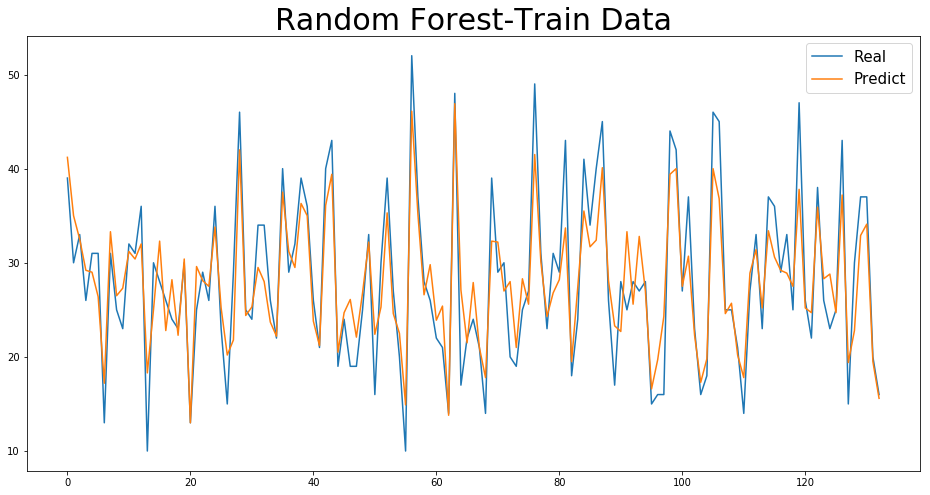

In [12]:

plt.figure(figsize=(16, 8))
plt.plot(y_train, label='Train')

plt.plot(y_train_predict, label='RF')
plt.legend(loc='best')

plt.legend(('Real', 'Predict'),loc='upper right',fontsize='15')
plt.title("Random Forest-Train Data",fontsize='30') #添加标题
plt.show()
#plt.savefig('RFtrain1.pdf')
#展示在训练集上的表现 

In [14]:
#在测试集上的预测
y_test_predict=model.predict(X_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


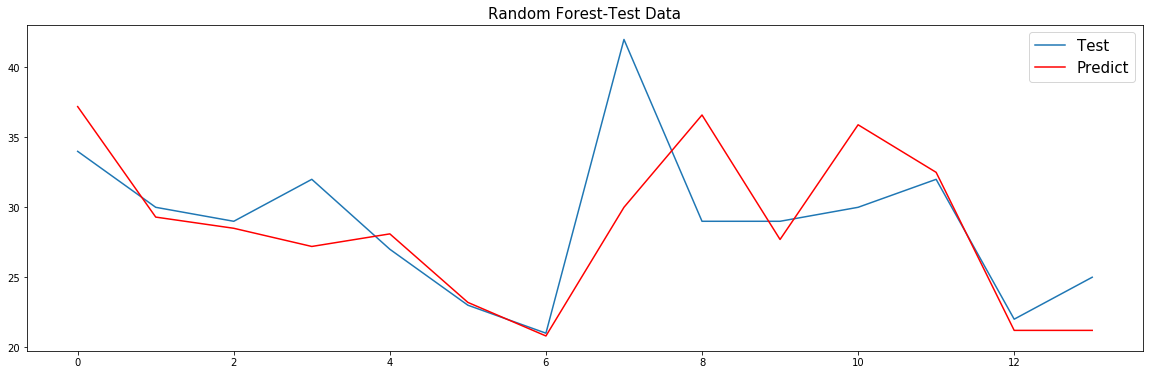

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(20,6))  # 创建图形
plt.plot(y_test)
##xxx = np.arange(190, 204, 1)
##print(xxx)
#plt.plot(xxx,y_test)
plt.plot(y_test_predict,color='red')

plt.legend(('Test', 'Predict'),fontsize='15')
plt.title("Random Forest-Test Data",fontsize='15') #添加标题
#plt.grid()
plt.show()
plt.savefig('RFtest.pdf')

In [16]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
def mpe(y_true, y_pred):
    return np.mean((y_pred - y_true) / y_true) * 100
def me(y_true, y_pred):
    return np.mean((y_pred - y_true) )


print('训练集上的MAE/MSE/MAPE/MPE/ME')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train))      
print(mape(y_train_predict, y_train) )
print(mpe(y_train_predict, y_train) )
print(me(y_train_predict, y_train) )

print('测试集上的MAE/MSE/MAPE/MPE/ME')
print(mean_absolute_error(y_test_predict, y_test))
print(np.abs(mean_absolute_error(y_test_predict, y_test)))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )
print(mpe(y_test_predict, y_test) )
print(me(y_test_predict, y_test) )



训练集上的MAE/MSE/MAPE/MPE/ME
3.2473684210526312
16.13962406015038
11.787772019268113
-0.5924051780136386
0.20827067669172944
测试集上的MAE/MSE/MAPE/MPE/ME
3.0428571428571423
3.0428571428571423
20.635714285714283
10.090011089383239
2.644748303480286
0.39999999999999986


In [ ]:
ME:	平均误差
RMSE	根均方误差
MAE	平均绝对误差
MPE	平均百分比误差
MAPE	平均绝对百分比误差
MASE	平均绝对比例误差
ACF1	滞后1阶误差的自相关

In [20]:
y_test

array([34, 30, 29, 32, 27, 23, 21, 42, 29, 29, 30, 32, 22, 25],
      dtype=int64)

In [21]:
y_test_predict

array([37.2, 29.3, 28.5, 27.2, 28.1, 23.2, 20.8, 30. , 36.6, 27.7, 35.9,
       32.5, 21.2, 21.2])